In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
xls =pd.ExcelFile("D:\Rutgers\Sem III\Research\Dr Esmat Research\DATA-KAHRAMAA\Actual Consumption from 2017 till March 2020\Actual EL consumption for Flat (Residential) 2017 till March 2020.xlsx")

In [3]:
xls.sheet_names

['2017', '2018', '2019', '2020']

In [4]:
sheet1 =xls.parse(0)
sheet2 =xls.parse(1)
sheet3 =xls.parse(2)
sheet1_copy = sheet1.copy()
sheet2_copy = sheet2.copy()
sheet3_copy = sheet3.copy()

# Sorting Sheet1 Dates

In [5]:
date_name = []
for col in sheet1.columns:
    if type(col) != str:
        date_name.append(col)

In [6]:
date_name

[datetime.datetime(2020, 1, 17, 0, 0),
 datetime.datetime(2020, 2, 17, 0, 0),
 datetime.datetime(2020, 3, 17, 0, 0),
 datetime.datetime(2020, 4, 17, 0, 0),
 datetime.datetime(2020, 5, 17, 0, 0),
 datetime.datetime(2020, 6, 17, 0, 0),
 datetime.datetime(2020, 7, 17, 0, 0),
 datetime.datetime(2020, 8, 17, 0, 0),
 datetime.datetime(2020, 9, 17, 0, 0),
 datetime.datetime(2020, 10, 17, 0, 0),
 datetime.datetime(2020, 11, 17, 0, 0),
 datetime.datetime(2020, 12, 17, 0, 0)]

In [7]:
for col in date_name:
    sheet1_copy.rename(columns = {col:'28.' + str(col.month) + '.2017'}, inplace =True)


In [8]:
# another way to rename columns that you want directly:
# rename_dict =dict(zip(date_name,sheet1_copy.index.tolist()))
# sheet1.rename(columns = rename_dict, inplace =True)

# Sorting Sheet2 & Sheet3 Dates

In [9]:
date_name1 = []
for col in sheet2.columns:
    if type(col) != str:
        date_name1.append(col)
date_name2 = []
for col in sheet3.columns:
    if type(col) != str:
        date_name2.append(col)

In [10]:
for col in date_name1:
    sheet2_copy.rename(columns = {col:'28.' + str(col.month) + '.2018'}, inplace =True)
for col in date_name2:
    sheet3_copy.rename(columns = {col:'28.' + str(col.month) + '.2019'}, inplace =True)

In [11]:
sheet3_copy.columns

Index(['Meter Type', 'Parent Number', 'Elec Num', 'Water Num', 'GL Class',
       'Customer Type', 'Premises Category', 'Premises Category Id',
       'Premises Name', 'Customer No', 'Tenant Name', 'Tenant Contact No',
       'Area Num', 'Area Name', '28.1.2019', '28.2.2019', '28.3.2019',
       '28.4.2019', '28.5.2019', '28.6.2019', '28.7.2019', '28.8.2019',
       '28.9.2019', '28.10.2019', '28.11.2019', '28.12.2019', 'Total 19',
       'X Coordinate', 'Y Coordinate', 'Pin', 'District', 'Zone', 'Street',
       'Plot'],
      dtype='object')

# Joining three sheets together:

In [12]:
my_list =[]
for col in sheet1.columns:
    if type(col) == str:
        my_list.append(col)
my_list

['Meter Type',
 'Parent Number',
 'Elec Num',
 'Water Num',
 'GL Class',
 'Customer Type',
 'Premises Category',
 'Premises Category Id',
 'Premises Name',
 'Customer No',
 'Tenant Name',
 'Tenant Contact No',
 'Area Num',
 'Area Name',
 'Total 17',
 'X Coordinate',
 'Y Coordinate',
 'Pin',
 'District',
 'Zone',
 'Street',
 'Plot']

In [13]:
my_list.remove('Total 17')

In [14]:
# another way to make a list of keys for joining upon:
a = list(sheet1.loc[:,:'Area Name'])

b = list(sheet1.loc[:,'X Coordinate':])

c = a +b
c

['Meter Type',
 'Parent Number',
 'Elec Num',
 'Water Num',
 'GL Class',
 'Customer Type',
 'Premises Category',
 'Premises Category Id',
 'Premises Name',
 'Customer No',
 'Tenant Name',
 'Tenant Contact No',
 'Area Num',
 'Area Name',
 'X Coordinate',
 'Y Coordinate',
 'Pin',
 'District',
 'Zone',
 'Street',
 'Plot']

In [15]:
_17plus18 = pd.merge(sheet1_copy, sheet2_copy, how ='inner', on = c)

In [16]:
_17_18_19 = pd.merge(_17plus18, sheet3_copy, how ='inner', on = c)
_17_18_19

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,28.4.2019,28.5.2019,28.6.2019,28.7.2019,28.8.2019,28.9.2019,28.10.2019,28.11.2019,28.12.2019,Total 19
0,Electricity,1065899,1065899,982863,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1601,1801,3953,4752,3985,3555,3710,2909,1553,30633
1,Electricity,1066042,1066042,983006,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1101,1649,3745,4485,4684,4039,3540,2706,748,28272
2,Electricity,1082331,1082331,1006158,TRD,Regular Customers,Flat (Residential),1,Flat,560538,...,1892,0,0,3191,1225,789,1186,1054,1546,14271
3,Electricity,1099982,1099982,1015187,TRD,Regular Customers,Flat (Residential),1,Flat,999657,...,96,415,557,734,583,603,318,60,93,3613
4,Electricity,188922,188922,160730,TRD,Regular Customers,Flat (Residential),1,Flat,171591,...,843,1205,3117,1854,1482,796,2962,2805,1746,18566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84661,Electricity,1108343,1108343,-,TRD,Regular Customers,Flat (Residential),1,Flat,516791,...,1201,1881,3674,4112,3990,4449,3096,2678,883,28996
84662,Electricity,186164,186164,-,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,583,529,622,579,535,561,560,607,633,6846
84663,Electricity,1065597,1065597,-,TRD,Regular Customers,Flat (Residential),1,Flat,1041261,...,701,548,1388,1622,2288,1743,1211,773,426,11877
84664,Electricity,1118539,1118539,-,TRD,Regular Customers,Flat (Residential),1,Flat,863991,...,4218,5766,6851,10680,10808,12388,9468,9137,4713,84591


In [17]:
merged_sheets = _17_18_19.copy()

In [18]:
merged_sheets = merged_sheets.drop(['Total 17', 'Total 18', 'Total 19'], axis =1)

In [19]:
list1 = list(merged_sheets.columns[-43:-31])

In [20]:
list2 = list(merged_sheets.columns[-24:])

In [21]:
date_list = list1 + list2
date_list

['28.1.2017',
 '28.2.2017',
 '28.3.2017',
 '28.4.2017',
 '28.5.2017',
 '28.6.2017',
 '28.7.2017',
 '28.8.2017',
 '28.9.2017',
 '28.10.2017',
 '28.11.2017',
 '28.12.2017',
 '28.1.2018',
 '28.2.2018',
 '28.3.2018',
 '28.4.2018',
 '28.5.2018',
 '28.6.2018',
 '28.7.2018',
 '28.8.2018',
 '28.9.2018',
 '28.10.2018',
 '28.11.2018',
 '28.12.2018',
 '28.1.2019',
 '28.2.2019',
 '28.3.2019',
 '28.4.2019',
 '28.5.2019',
 '28.6.2019',
 '28.7.2019',
 '28.8.2019',
 '28.9.2019',
 '28.10.2019',
 '28.11.2019',
 '28.12.2019']

In [22]:
df1 = merged_sheets[date_list]
df2= merged_sheets[my_list]



In [23]:
df_processed = pd.concat([df2, df1], axis =1)

# Now you start your analysis on df_processed

In [24]:
df_processed['Sum'] = df_processed[date_list].sum(axis =1)
df_processed

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,28.4.2019,28.5.2019,28.6.2019,28.7.2019,28.8.2019,28.9.2019,28.10.2019,28.11.2019,28.12.2019,Sum
0,Electricity,1065899,1065899,982863,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1601,1801,3953,4752,3985,3555,3710,2909,1553,87875
1,Electricity,1066042,1066042,983006,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1101,1649,3745,4485,4684,4039,3540,2706,748,71846
2,Electricity,1082331,1082331,1006158,TRD,Regular Customers,Flat (Residential),1,Flat,560538,...,1892,0,0,3191,1225,789,1186,1054,1546,41020
3,Electricity,1099982,1099982,1015187,TRD,Regular Customers,Flat (Residential),1,Flat,999657,...,96,415,557,734,583,603,318,60,93,12017
4,Electricity,188922,188922,160730,TRD,Regular Customers,Flat (Residential),1,Flat,171591,...,843,1205,3117,1854,1482,796,2962,2805,1746,57151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84661,Electricity,1108343,1108343,-,TRD,Regular Customers,Flat (Residential),1,Flat,516791,...,1201,1881,3674,4112,3990,4449,3096,2678,883,87833
84662,Electricity,186164,186164,-,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,583,529,622,579,535,561,560,607,633,17503
84663,Electricity,1065597,1065597,-,TRD,Regular Customers,Flat (Residential),1,Flat,1041261,...,701,548,1388,1622,2288,1743,1211,773,426,23685
84664,Electricity,1118539,1118539,-,TRD,Regular Customers,Flat (Residential),1,Flat,863991,...,4218,5766,6851,10680,10808,12388,9468,9137,4713,240508


In [25]:
just_the_date= df1.T

In [26]:
just_the_date['sum'] = just_the_date.sum(axis=1)

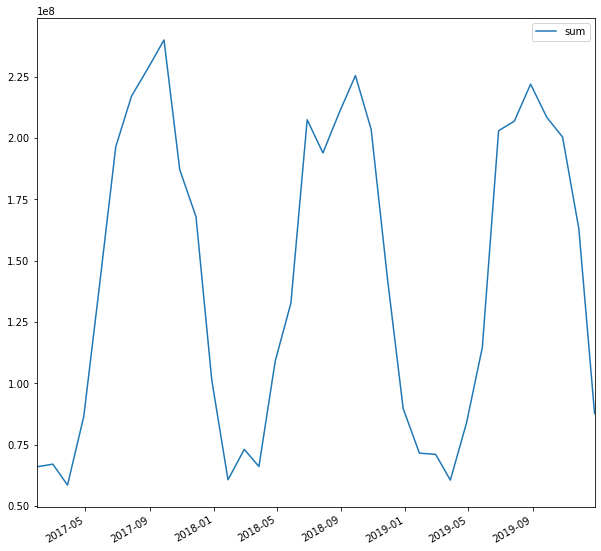

In [219]:
just_the_date.plot(y ='sum', kind ='line', figsize =(10,10))


In [28]:
just_the_date.index = pd.to_datetime(just_the_date.index)

In [29]:
just_the_date

,0,1,2,3,4,5,6,7,8,9,...,84657,84658,84659,84660,84661,84662,84663,84664,84665,sum
2017-01-28,690,334,1283,132,474,214,425,191,321,388,...,2204,966,1482,465,817,504,717,2351,1559,65929222
2017-02-28,806,342,2146,52,536,198,881,201,191,444,...,1525,815,1055,589,1040,478,642,1896,1529,67026267
2017-03-28,526,269,1194,92,504,210,0,210,275,473,...,1007,529,921,357,949,423,0,1236,993,58497674
2017-04-28,1049,280,0,200,535,1120,627,177,568,737,...,1802,1267,1204,292,1299,379,0,3371,1988,86478334
2017-05-28,2153,2168,1664,354,1618,339,0,165,0,1662,...,3347,2865,1871,500,2047,416,0,7718,2453,139857729
2017-06-28,1812,2759,1652,614,2342,1831,0,551,1402,3613,...,6178,3216,4618,0,0,429,9,7984,3829,196400820
2017-07-28,2707,1890,1045,855,2063,1003,365,1159,1810,3568,...,5876,4872,4201,1711,8246,542,46,10608,3782,217023687
2017-08-28,3954,3103,0,660,1374,2269,126,1035,2020,6091,...,6726,6646,4188,493,4384,519,86,8285,3024,228231690
2017-09-28,4704,2866,0,655,3104,1724,225,776,1742,5443,...,12936,7784,5456,325,4435,505,242,11358,0,239927665
2017-10-28,2799,1760,0,398,2753,1750,125,80,0,3464,...,3174,6251,1254,473,3437,529,1060,6928,8801,187039822


# Converting df_processed dates from strings to datetime format 

In [30]:
date_change_dict = dict(zip(list(df_processed[date_list].columns), list(just_the_date.index)))
date_change_dict

{'28.1.2017': Timestamp('2017-01-28 00:00:00'),
 '28.2.2017': Timestamp('2017-02-28 00:00:00'),
 '28.3.2017': Timestamp('2017-03-28 00:00:00'),
 '28.4.2017': Timestamp('2017-04-28 00:00:00'),
 '28.5.2017': Timestamp('2017-05-28 00:00:00'),
 '28.6.2017': Timestamp('2017-06-28 00:00:00'),
 '28.7.2017': Timestamp('2017-07-28 00:00:00'),
 '28.8.2017': Timestamp('2017-08-28 00:00:00'),
 '28.9.2017': Timestamp('2017-09-28 00:00:00'),
 '28.10.2017': Timestamp('2017-10-28 00:00:00'),
 '28.11.2017': Timestamp('2017-11-28 00:00:00'),
 '28.12.2017': Timestamp('2017-12-28 00:00:00'),
 '28.1.2018': Timestamp('2018-01-28 00:00:00'),
 '28.2.2018': Timestamp('2018-02-28 00:00:00'),
 '28.3.2018': Timestamp('2018-03-28 00:00:00'),
 '28.4.2018': Timestamp('2018-04-28 00:00:00'),
 '28.5.2018': Timestamp('2018-05-28 00:00:00'),
 '28.6.2018': Timestamp('2018-06-28 00:00:00'),
 '28.7.2018': Timestamp('2018-07-28 00:00:00'),
 '28.8.2018': Timestamp('2018-08-28 00:00:00'),
 '28.9.2018': Timestamp('2018-09-28 0

In [31]:
df_processed.rename(columns = date_change_dict, inplace =True)
df_processed

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-04-28 00:00:00,2019-05-28 00:00:00,2019-06-28 00:00:00,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum
0,Electricity,1065899,1065899,982863,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1601,1801,3953,4752,3985,3555,3710,2909,1553,87875
1,Electricity,1066042,1066042,983006,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1101,1649,3745,4485,4684,4039,3540,2706,748,71846
2,Electricity,1082331,1082331,1006158,TRD,Regular Customers,Flat (Residential),1,Flat,560538,...,1892,0,0,3191,1225,789,1186,1054,1546,41020
3,Electricity,1099982,1099982,1015187,TRD,Regular Customers,Flat (Residential),1,Flat,999657,...,96,415,557,734,583,603,318,60,93,12017
4,Electricity,188922,188922,160730,TRD,Regular Customers,Flat (Residential),1,Flat,171591,...,843,1205,3117,1854,1482,796,2962,2805,1746,57151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84661,Electricity,1108343,1108343,-,TRD,Regular Customers,Flat (Residential),1,Flat,516791,...,1201,1881,3674,4112,3990,4449,3096,2678,883,87833
84662,Electricity,186164,186164,-,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,583,529,622,579,535,561,560,607,633,17503
84663,Electricity,1065597,1065597,-,TRD,Regular Customers,Flat (Residential),1,Flat,1041261,...,701,548,1388,1622,2288,1743,1211,773,426,23685
84664,Electricity,1118539,1118539,-,TRD,Regular Customers,Flat (Residential),1,Flat,863991,...,4218,5766,6851,10680,10808,12388,9468,9137,4713,240508


In [32]:
all_dates_list = list(just_the_date.index)

In [36]:
just_the_date.resample('Q', axis=0).mean()

,0,1,2,3,4,5,6,7,8,9,...,84657,84658,84659,84660,84661,84662,84663,84664,84665,sum
2017-03-31,674.000000,315.000000,1541.000000,92.000000,504.666667,207.333333,435.333333,200.666667,262.333333,435.000000,...,1578.666667,770.000000,1152.666667,470.333333,935.333333,468.333333,453.000000,1827.666667,1360.333333,6.381772e+07
2017-06-30,1671.333333,1735.666667,1105.333333,389.333333,1498.333333,1096.666667,209.000000,297.666667,656.666667,2004.000000,...,3775.666667,2449.333333,2564.333333,264.000000,1115.333333,408.000000,3.000000,6357.666667,2756.666667,1.409123e+08
2017-09-30,3788.333333,2619.666667,348.333333,723.333333,2180.333333,1665.333333,238.666667,990.000000,1857.333333,5034.000000,...,8512.666667,6434.000000,4615.000000,843.000000,5688.333333,522.000000,124.666667,10083.666667,2268.666667,2.283943e+08
2017-12-31,1916.000000,1215.333333,1951.000000,276.333333,2536.000000,1217.333333,118.000000,272.333333,119.333333,2693.000000,...,4477.000000,4669.666667,1895.666667,551.666667,2428.000000,439.333333,790.000000,6251.000000,4240.666667,1.521200e+08
2018-03-31,669.666667,820.666667,967.333333,55.000000,468.000000,290.333333,233.000000,279.000000,558.333333,591.666667,...,707.333333,1063.333333,1441.000000,441.000000,1227.666667,398.000000,295.000000,2246.333333,1153.333333,6.659700e+07
2018-06-30,2350.333333,1919.000000,961.000000,433.333333,1687.333333,1226.666667,538.333333,139.000000,1614.000000,424.333333,...,4315.666667,1.333333,2115.333333,541.000000,2722.000000,378.000000,793.000000,6817.333333,1917.000000,1.497070e+08
2018-09-30,5473.333333,4259.666667,985.000000,517.666667,2148.000000,1636.000000,351.333333,0.333333,4017.000000,3646.666667,...,6671.000000,2.666667,4177.000000,568.000000,3433.000000,451.666667,1014.333333,10612.666667,2742.000000,2.098507e+08
2018-12-31,2537.666667,1639.666667,1057.333333,314.333333,1839.000000,838.333333,606.000000,15.666667,2761.000000,2829.666667,...,4618.333333,24.333333,1202.666667,450.666667,2062.666667,487.000000,463.000000,7776.000000,1600.000000,1.453312e+08
2019-03-31,938.000000,525.000000,1129.333333,51.333333,585.333333,228.000000,104.666667,313.666667,214.000000,1330.666667,...,1507.000000,1.333333,815.333333,324.000000,1010.666667,545.666667,392.333333,3520.666667,922.000000,6.767533e+07
2019-06-30,2451.666667,2165.000000,630.666667,356.000000,1721.666667,954.000000,62.333333,1876.666667,3.333333,1553.666667,...,2386.666667,4.000000,1671.333333,2033.333333,2252.000000,578.000000,879.000000,5611.666667,1421.000000,1.338697e+08


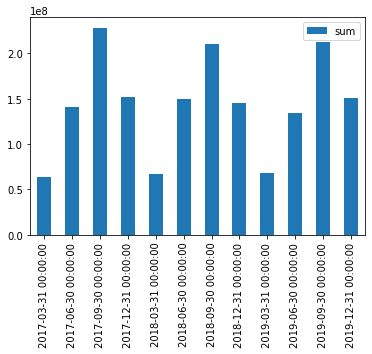

In [37]:
just_the_date.resample('Q', axis=0).mean().plot(y ='sum', kind ='bar')

Index([          'Meter Type',        'Parent Number',             'Elec Num',
                  'Water Num',             'GL Class',        'Customer Type',
          'Premises Category', 'Premises Category Id',        'Premises Name',
                'Customer No',          'Tenant Name',    'Tenant Contact No',
                   'Area Num',            'Area Name',         'X Coordinate',
               'Y Coordinate',                  'Pin',             'District',
                       'Zone',               'Street',                 'Plot',
          2017-01-28 00:00:00,    2017-02-28 00:00:00,    2017-03-28 00:00:00,
          2017-04-28 00:00:00,    2017-05-28 00:00:00,    2017-06-28 00:00:00,
          2017-07-28 00:00:00,    2017-08-28 00:00:00,    2017-09-28 00:00:00,
          2017-10-28 00:00:00,    2017-11-28 00:00:00,    2017-12-28 00:00:00,
          2018-01-28 00:00:00,    2018-02-28 00:00:00,    2018-03-28 00:00:00,
          2018-04-28 00:00:00,    2018-05-28 00:00:0

In [45]:
df_processed['Area Name'].unique()

array(['Al-Wkeer', 'West Bay (Al-Doha Al-Hadetha)', 'Umm Ghuwailina',
       'Al-Mansoura - Ben Derhum', 'Mushareb', 'Al-Muntazha',
       'Ben Mahmoud', 'Old Airport', 'Ummsead - Residential',
       'Al-ghanam al kadeem shamal', 'Al-Saad',
       'Ben Emran - The New Al-Hetmee', 'Al-Mergab - Al-Naser',
       'Umm slal / Khreteat', 'Al-Mamoura - Ain Khaled - Al-K',
       'Al Soudan-S/Al Aziziya/Al Ghan', 'Fareq Abdul-Aziz',
       'Al-Doha Al-Jadeda', 'Westren Al-Helal',
       'Al Lugta / Al Rayyan AL Qadeem', 'Madinat Khalifa (south)',
       'Najmaa', 'Al-Khoor', 'Al-Maseela', 'South Old Al-Ganem',
       'East Al-Helal', 'Al-Najada', 'Al-Wakra', 'Al-Thekhera',
       'Northern Ben Mahmoud', 'Deplomatic Zone', 'Kulaib',
       'Al-Rayan Al-Jadeed-North Moait', 'Fareeq the Old Hitmee',
       'Al-Salata', 'Al Gharrafa / Bani Hajer', 'Airport Doha',
       'Industrial Area', 'Al-Salata Al Jadeeda  Al Asiri', 'Al Roodah',
       'The Amire Area - Murakh - Nort', 'Al-Asmakh', 'Qatar 

In [46]:
df_processed['Customer Type'].unique()

array(['Regular Customers', 'Qatari Owners',
       "Rented Premises by Qatari's", 'Government Owned'], dtype=object)

In [47]:
df_processed['Premises Name'].unique()

array(['Flat', 'Maajles', 'Room', 'Villa', 'House', 'Car  park',
       'Additional distrubution meter', 'Left Entrance', 'Extention',
       'Restaurent', 'Building service', 'Electricity Pump', 'Building',
       'Transmission Station', 'Guard Room', 'Shop', 'Fire Fighting Line',
       'Majlis', 'Camel Racing  Manor', 'Club', 'Palace', 'Clinic',
       'Desert houses', 'Temporory Electricity', 'Super market', 'Office',
       'worker dwelling', 'Gallery', 'Fire Substation', 'Canteen',
       'Beach cabin', 'Swimming pool', 'Electricity switch'], dtype=object)

In [51]:
seventeen = []
eighteen = []
nineteen = []
for col in df_processed:
    if type(col) != str:
        if col.year == 2017:
            seventeen.append(col)
        elif col.year == 2018:
            eighteen.append(col)
        else:
            nineteen.append(col)

In [52]:
df_processed['Total 17'] = df_processed[seventeen].sum(axis=1)
df_processed

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-05-28 00:00:00,2019-06-28 00:00:00,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17
0,Electricity,1065899,1065899,982863,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1801,3953,4752,3985,3555,3710,2909,1553,87875,24149
1,Electricity,1066042,1066042,983006,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,1649,3745,4485,4684,4039,3540,2706,748,71846,17657
2,Electricity,1082331,1082331,1006158,TRD,Regular Customers,Flat (Residential),1,Flat,560538,...,0,0,3191,1225,789,1186,1054,1546,41020,14837
3,Electricity,1099982,1099982,1015187,TRD,Regular Customers,Flat (Residential),1,Flat,999657,...,415,557,734,583,603,318,60,93,12017,4443
4,Electricity,188922,188922,160730,TRD,Regular Customers,Flat (Residential),1,Flat,171591,...,1205,3117,1854,1482,796,2962,2805,1746,57151,20158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84661,Electricity,1108343,1108343,-,TRD,Regular Customers,Flat (Residential),1,Flat,516791,...,1881,3674,4112,3990,4449,3096,2678,883,87833,30501
84662,Electricity,186164,186164,-,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,529,622,579,535,561,560,607,633,17503,5513
84663,Electricity,1065597,1065597,-,TRD,Regular Customers,Flat (Residential),1,Flat,1041261,...,548,1388,1622,2288,1743,1211,773,426,23685,4112
84664,Electricity,1118539,1118539,-,TRD,Regular Customers,Flat (Residential),1,Flat,863991,...,5766,6851,10680,10808,12388,9468,9137,4713,240508,73560


In [53]:
df_processed['Total 18'] = df_processed[eighteen].sum(axis=1)
df_processed['Total 19'] = df_processed[nineteen].sum(axis=1)

In [58]:
df_processed.columns

Index([          'Meter Type',        'Parent Number',             'Elec Num',
                  'Water Num',             'GL Class',        'Customer Type',
          'Premises Category', 'Premises Category Id',        'Premises Name',
                'Customer No',          'Tenant Name',    'Tenant Contact No',
                   'Area Num',            'Area Name',         'X Coordinate',
               'Y Coordinate',                  'Pin',             'District',
                       'Zone',               'Street',                 'Plot',
          2017-01-28 00:00:00,    2017-02-28 00:00:00,    2017-03-28 00:00:00,
          2017-04-28 00:00:00,    2017-05-28 00:00:00,    2017-06-28 00:00:00,
          2017-07-28 00:00:00,    2017-08-28 00:00:00,    2017-09-28 00:00:00,
          2017-10-28 00:00:00,    2017-11-28 00:00:00,    2017-12-28 00:00:00,
          2018-01-28 00:00:00,    2018-02-28 00:00:00,    2018-03-28 00:00:00,
          2018-04-28 00:00:00,    2018-05-28 00:00:0

In [79]:
aggregate_df = df_processed.groupby(['Customer Type']).agg({'Sum':['sum','count','mean' ,'median'],'Total 17':['sum','count','mean','median'],'Total 18':['sum','count','mean', 'median'], 'Total 19':['sum','count','mean','median']})

In [83]:
aggregate_df

Sum                                  \
                                    sum  count           mean    median   
Customer Type                                                             
Government Owned                  82070      2   41035.000000   41035.0   
Qatari Owners                 107663495    465  231534.397849  177658.0   
Regular Customers            4996438425  83536   59811.798805   48449.5   
Rented Premises by Qatari's    58742693    663   88601.346908   69704.0   

                               Total 17                                \
                                    sum  count          mean   median   
Customer Type                                                           
Government Owned                  26713      2  13356.500000  13356.5   
Qatari Owners                  36763296    465  79060.851613  60217.0   
Regular Customers            1698924663  83536  20337.634828  16454.0   
Rented Premises by Qatari's    20018363    663  30193.609351  23598.0   

                               Total 18                                \
                                    sum  count          mean   median   
Customer Type                                                           
Government Owned                  25523      2  12761.500000  12761.5   
Qatari Owners                  36024097    465  77471.176344  57855.0   
Regular Customers            1659469047  83536  19865.316115  15767.0   
Rented Premises by Qatari's    18939177    663  28565.877828  23340.0   

                               Total 19                                
                                    sum  count          mean   median  
Customer Type                                                          
Government Owned                  29834      2  14917.000000  14917.0  
Qatari Owners                  34876102    465  75002.369892  57070.0  
Regular Customers            1638044715  83536  19608.847862  15547.5  
Rented Premises by Qatari's    19785153    663  29841.859729  23247.0

In [81]:
aggregate_df.columns

MultiIndex([(     'Sum',    'sum'),
            (     'Sum',  'count'),
            (     'Sum',   'mean'),
            (     'Sum', 'median'),
            ('Total 17',    'sum'),
            ('Total 17',  'count'),
            ('Total 17',   'mean'),
            ('Total 17', 'median'),
            ('Total 18',    'sum'),
            ('Total 18',  'count'),
            ('Total 18',   'mean'),
            ('Total 18', 'median'),
            ('Total 19',    'sum'),
            ('Total 19',  'count'),
            ('Total 19',   'mean'),
            ('Total 19', 'median')],
           )

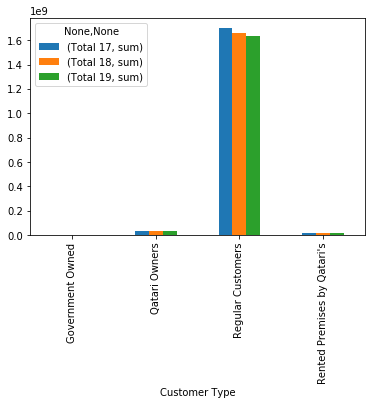

In [98]:
aggregate_df.plot(y = [aggregate_df.columns[4], aggregate_df.columns[8], aggregate_df.columns[12]], kind ='bar')
#df.plot(x="X", y=["A", "B", "C"], kind="bar")

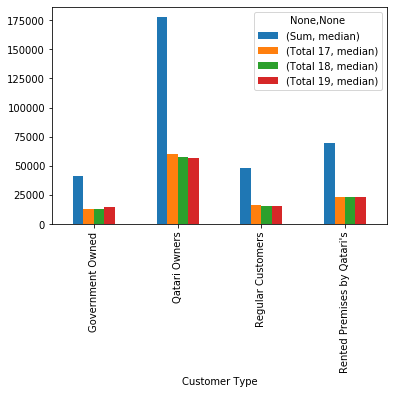

In [100]:
aggregate_df.plot(y = [aggregate_df.columns[3], aggregate_df.columns[7], aggregate_df.columns[11], aggregate_df.columns[15]], kind ='bar')

In [125]:
aggregate_df

Sum                                  \
                                    sum  count           mean    median   
Customer Type                                                             
Government Owned                  82070      2   41035.000000   41035.0   
Qatari Owners                 107663495    465  231534.397849  177658.0   
Regular Customers            4996438425  83536   59811.798805   48449.5   
Rented Premises by Qatari's    58742693    663   88601.346908   69704.0   

                               Total 17                                \
                                    sum  count          mean   median   
Customer Type                                                           
Government Owned                  26713      2  13356.500000  13356.5   
Qatari Owners                  36763296    465  79060.851613  60217.0   
Regular Customers            1698924663  83536  20337.634828  16454.0   
Rented Premises by Qatari's    20018363    663  30193.609351  23598.0   

                               Total 18                                \
                                    sum  count          mean   median   
Customer Type                                                           
Government Owned                  25523      2  12761.500000  12761.5   
Qatari Owners                  36024097    465  77471.176344  57855.0   
Regular Customers            1659469047  83536  19865.316115  15767.0   
Rented Premises by Qatari's    18939177    663  28565.877828  23340.0   

                               Total 19                                
                                    sum  count          mean   median  
Customer Type                                                          
Government Owned                  29834      2  14917.000000  14917.0  
Qatari Owners                  34876102    465  75002.369892  57070.0  
Regular Customers            1638044715  83536  19608.847862  15547.5  
Rented Premises by Qatari's    19785153    663  29841.859729  23247.0

Text(0, 0.5, 'count of customer')

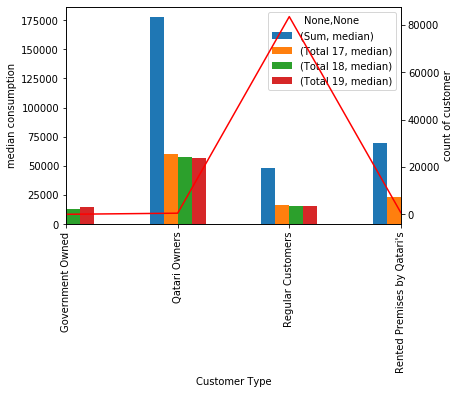

In [139]:
ax = aggregate_df.plot(y = [aggregate_df.columns[3], aggregate_df.columns[7], aggregate_df.columns[11], aggregate_df.columns[15]], kind ='bar')
ax.set_ylabel('median consumption')
ax1 = ax.twinx()
ax1 = aggregate_df[aggregate_df.columns[1]].plot(kind = 'line',color ='r')
ax1.set_ylabel('count of customer')


In [ ]:
# fig, ax =plt.subplots()
# ax.plot(df_grouped[df_grouped.columns[4]], kind ='bar', color ='red')
# ax2 =ax.twinx()
# ax2.plot(df_grouped[df_grouped.columns[3]], kind ='bar',color ='blue' )

ax = df_grouped[df_grouped.columns[4]].plot(kind='bar')
ax.set_ylabel('mean consumtpion')
ax1 = ax.twinx()
ax1 = df_grouped[df_grouped.columns[3]].plot(color ='r')
ax1.set_ylabel('count of customer')

In [168]:
import numpy as np

In [172]:
df_processed.pivot_table(values ='Sum', index = 'Premises Name', columns= 'Customer Type', aggfunc = [np.sum, np.median])

sum                \
Customer Type                 Government Owned Qatari Owners   
Premises Name                                                  
Additional distrubution meter              NaN           NaN   
Beach cabin                                NaN     4605410.0   
Building                                   NaN           NaN   
Building service                           NaN           NaN   
Camel Racing  Manor                        NaN           NaN   
Canteen                                    NaN           NaN   
Car  park                                  NaN           NaN   
Clinic                                     NaN           NaN   
Club                                       NaN           NaN   
Desert houses                              NaN           NaN   
Electricity Pump                           NaN           NaN   
Electricity switch                         NaN           NaN   
Extention                                  NaN       22225.0   
Fire Fighting Line                         NaN           NaN   
Fire Substation                            NaN           NaN   
Flat                                   82070.0     4344571.0   
Gallery                                    NaN           NaN   
Guard Room                                 NaN           NaN   
House                                      NaN     3515262.0   
Left Entrance                              NaN           NaN   
Maajles                                    NaN    82803945.0   
Majlis                                     NaN     1540584.0   
Office                                     NaN           NaN   
Palace                                     NaN      174456.0   
Restaurent                                 NaN           NaN   
Room                                       NaN      441125.0   
Shop                                       NaN           NaN   
Super market                               NaN           NaN   
Swimming pool                              NaN           NaN   
Temporory Electricity                      NaN           NaN   
Transmission Station                       NaN           NaN   
Villa                                      NaN    10215917.0   
worker dwelling                            NaN           NaN   

                                                                             \
Customer Type                 Regular Customers Rented Premises by Qatari's   
Premises Name                                                                 
Additional distrubution meter      8.596850e+05                    122103.0   
Beach cabin                        1.058450e+05                         NaN   
Building                           2.092160e+05                         NaN   
Building service                   6.305188e+06                         NaN   
Camel Racing  Manor                1.717270e+05                         NaN   
Canteen                            3.006420e+05                         NaN   
Car  park                          6.634070e+05                         NaN   
Clinic                             1.289500e+05                         NaN   
Club                               8.139622e+06                         NaN   
Desert houses                      3.225910e+05                         NaN   
Electricity Pump                   3.947318e+06                         NaN   
Electricity switch                 3.531890e+05                         NaN   
Extention                          9.003600e+05                    122865.0   
Fire Fighting Line                 5.069570e+05                         NaN   
Fire Substation                    3.233900e+04                         NaN   
Flat                               4.889666e+09                  47065389.0   
Gallery                            3.263620e+05                         NaN   
Guard Room                         4.374890e+05                         NaN   
House                              5.357969e+06                   1809039.0   


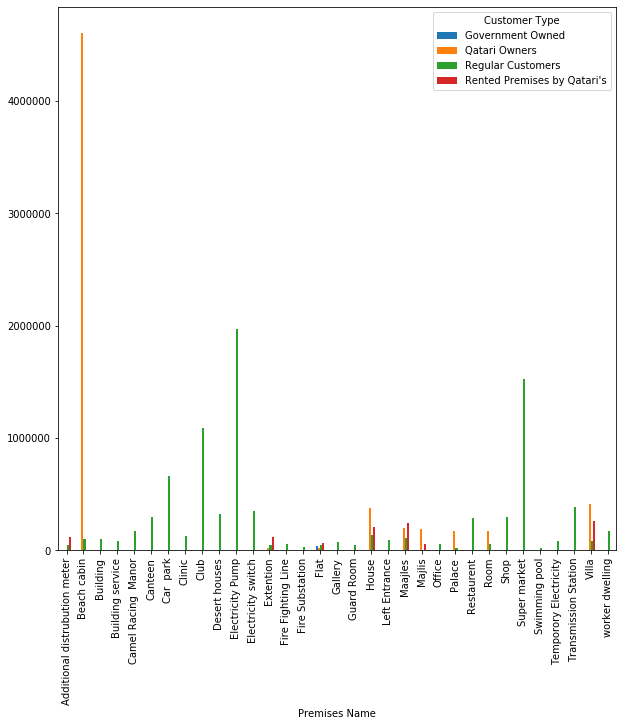

In [173]:
df_processed.pivot_table(values ='Sum', index = 'Premises Name', columns= 'Customer Type', aggfunc = np.median).plot(kind ='bar', figsize =(10,10))

In [157]:
df_processed_pivot= df_processed.pivot_table(values ='Sum', index = 'Premises Name', columns= 'Customer Type')

In [165]:
df_processed_pivot.sort_values(by = ['Qatari Owners','Regular Customers'], ascending =False)

Customer Type,Government Owned,Qatari Owners,Regular Customers,Rented Premises by Qatari's
Premises Name,,,,
Beach cabin,NaN,4.605410e+06,1.058450e+05,NaN
Villa,NaN,4.441703e+05,1.275098e+05,246605.187500
House,NaN,3.195693e+05,1.984433e+05,258434.142857
Maajles,NaN,2.400114e+05,1.605290e+05,255593.272727
Majlis,NaN,2.200834e+05,NaN,54562.000000
Palace,NaN,1.744560e+05,2.328100e+04,NaN
Room,NaN,1.470417e+05,1.064474e+05,NaN
Flat,41035.0,5.951467e+04,5.898910e+04,76529.087805
Extention,NaN,2.222500e+04,6.002400e+04,122865.000000


In [175]:
df_processed[df_processed['Premises Name'] == 'Beach cabin']

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
52595,Electricity,188395,188395,-,TRD,Regular Customers,Flat (Residential),1,Beach cabin,529755,...,5486,6164,4951,4432,4467,1242,105845,37288,32192,36365
68043,Electricity,1157768,1157768,1092546,QTR,Qatari Owners,Flat (Residential),1,Beach cabin,564032,...,138500,138900,169200,126970,117110,74790,4605410,1712430,1708030,1184950


# ASSESSING QATARI OWNERS

In [177]:
qatari_owners = df_processed[df_processed['Customer Type'] == 'Qatari Owners']

In [183]:
summary_qo = qatari_owners.groupby(['Premises Name']).agg({'Sum':['sum','count','mean' ,'median'],'Total 17':['sum','count','mean','median'],'Total 18':['sum','count','mean', 'median'], 'Total 19':['sum','count','mean','median']})

In [187]:
summary_qo

Sum                               Total 17        \
                    sum count          mean   median       sum count   
Premises Name                                                          
Beach cabin     4605410     1  4.605410e+06  4605410   1712430     1   
Extention         22225     1  2.222500e+04    22225      6469     1   
Flat            4344571    73  5.951467e+04    20992   1429241    73   
House           3515262    11  3.195693e+05   380614   1148371    11   
Maajles        82803945   345  2.400114e+05   198093  28287624   345   
Majlis          1540584     7  2.200834e+05   188984    519476     7   
Palace           174456     1  1.744560e+05   174456     69360     1   
Room             441125     3  1.470417e+05   176930    150658     3   
Villa          10215917    23  4.441703e+05   410213   3439667    23   

                                      Total 18                               \
                       mean   median       sum count          mean   median   
Premises Name                                                                 
Beach cabin    1.712430e+06  1712430   1708030     1  1.708030e+06  1708030   
Extention      6.469000e+03     6469      7868     1  7.868000e+03     7868   
Flat           1.957864e+04     6220   1480578    73  2.028189e+04     6895   
House          1.043974e+05   128156   1192570    11  1.084155e+05   118766   
Maajles        8.199311e+04    62930  27517276   345  7.976022e+04    64965   
Majlis         7.421086e+04    73122    531263     7  7.589471e+04    73799   
Palace         6.936000e+04    69360     55769     1  5.576900e+04    55769   
Room           5.021933e+04    57765    155749     3  5.191633e+04    58647   
Villa          1.495507e+05   143535   3374994    23  1.467389e+05   138206   

               Total 19                               
                    sum count          mean   median  
Premises Name                                         
Beach cabin     1184950     1  1.184950e+06  1184950  
Extention          7888     1  7.888000e+03     7888  
Flat            1434752    73  1.965414e+04     7735  
House           1174321    11  1.067565e+05   117526  
Maajles        26999045   345  7.825810e+04    65165  
Majlis           489845     7  6.997786e+04    64743  
Palace            49327     1  4.932700e+04    49327  
Room             134718     3  4.490600e+04    55033  
Villa           3401256    23  1.478807e+05   134631

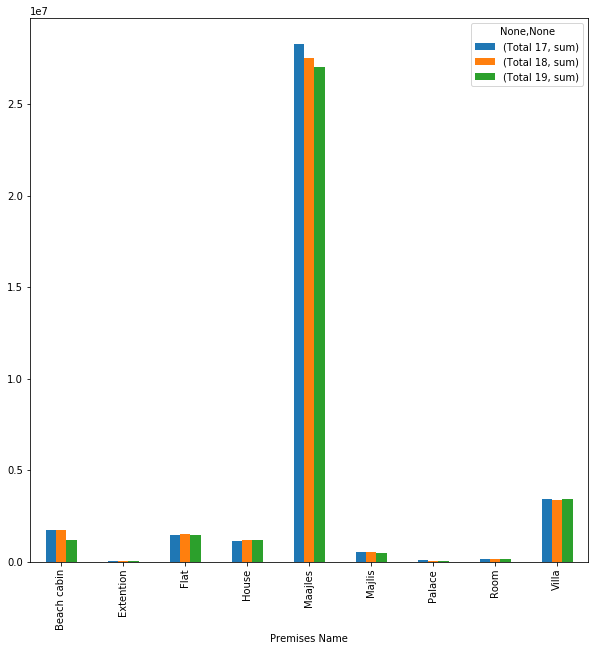

In [194]:
summary_qo.plot(y= [summary_qo.columns[4], summary_qo.columns[8], summary_qo.columns[12]], kind ='bar',figsize =(10,10))

# ASSESSING REGULAR CUSTOMER'S MAJLIS

In [199]:
Regular_Customers = df_processed[df_processed['Customer Type'] == 'Regular Customers']

In [201]:
summary_rc = Regular_Customers.groupby(['Premises Name']).agg({'Sum':['sum','count','mean' ,'median'],'Total 17':['sum','count','mean','median'],'Total 18':['sum','count','mean', 'median'], 'Total 19':['sum','count','mean','median']})

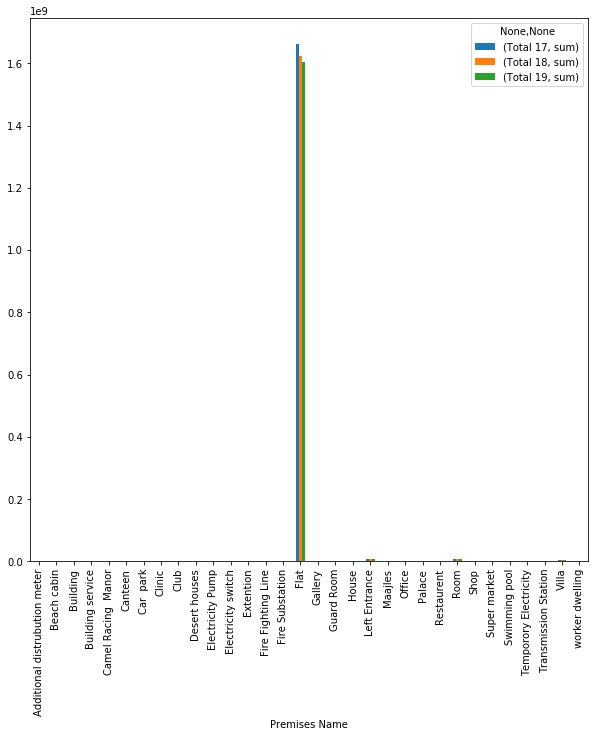

In [202]:
summary_rc.plot(y= [summary_qo.columns[4], summary_qo.columns[8], summary_qo.columns[12]], kind ='bar',figsize =(10,10))

# Also checking the graph without flats

In [205]:
rc_wo_flat = df_processed[(df_processed['Customer Type'] == 'Regular Customers') & (df_processed['Premises Name'] != 'Flat')]


In [207]:
rc_summary_wo_flat=rc_wo_flat.groupby(['Premises Name']).agg({'Sum':['sum','count','mean' ,'median'],'Total 17':['sum','count','mean','median'],'Total 18':['sum','count','mean', 'median'], 'Total 19':['sum','count','mean','median']})

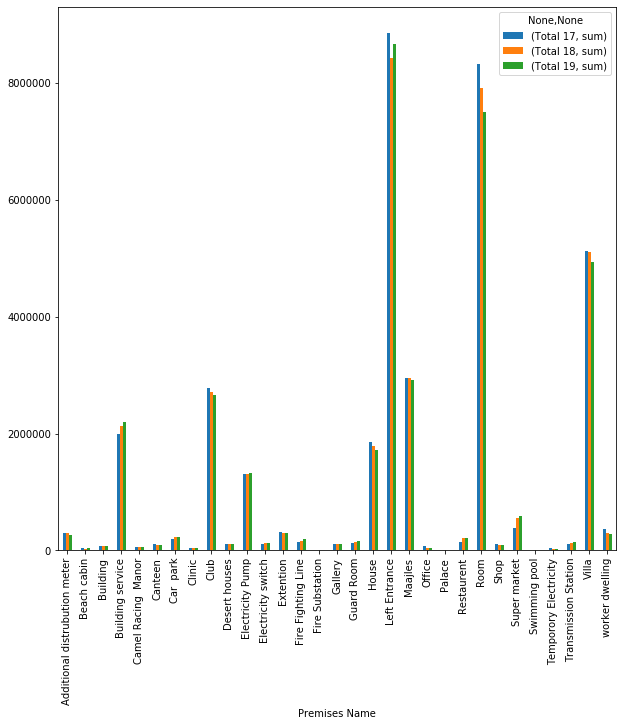

In [208]:
rc_summary_wo_flat.plot(y= [summary_qo.columns[4], summary_qo.columns[8], summary_qo.columns[12]], kind ='bar',figsize =(10,10))

# RUNNING T Test on Qatari Majlis vs RC Majlis

In [195]:
from scipy import stats

In [209]:
qatari_owners_maajles = qatari_owners[qatari_owners['Premises Name'] == 'Maajles']
qatari_owners_maajles

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
95,Electricity,161471,161471,165559,QTR,Qatari Owners,Flat (Residential),1,Maajles,503917,...,21935,12046,7739,6786,5601,3248,255942,87045,91282,77615
158,Electricity,156137,156137,717689,QTR,Qatari Owners,Flat (Residential),1,Maajles,589780,...,7882,8889,6839,6200,4700,1770,143542,47571,44451,51520
1007,Electricity,94125,94125,69701,QTR,Qatari Owners,Flat (Residential),1,Maajles,693267,...,22081,23100,19416,16727,16100,8255,516736,183322,176600,156814
1476,Electricity,96048,96048,86950,QTR,Qatari Owners,Flat (Residential),1,Maajles,579691,...,17812,20572,14957,8637,16573,4840,369246,123971,121778,123497
1911,Electricity,103533,103533,77048,QTR,Qatari Owners,Flat (Residential),1,Maajles,219424,...,3940,3507,3338,4352,4243,1535,119885,48094,41362,30429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83120,Electricity,90577,90577,158402,QTR,Qatari Owners,Flat (Residential),1,Maajles,576763,...,5868,5758,6324,5134,4513,2538,161411,54325,56256,50830
83994,Electricity,81369,81369,58234,QTR,Qatari Owners,Flat (Residential),1,Maajles,603879,...,24191,27429,22487,23677,14808,9852,631266,222429,216528,192309
84240,Electricity,1003777,1003777,903831,QTR,Qatari Owners,Flat (Residential),1,Maajles,569633,...,16422,15634,13828,14492,15188,4184,346240,115868,120331,110041
84618,Electricity,67465,67465,-,QTR,Qatari Owners,Flat (Residential),1,Maajles,657573,...,7606,11232,9992,6243,5600,2596,215236,77063,71887,66286


In [211]:
Regular_Customers_Maajles= Regular_Customers[Regular_Customers['Premises Name'] == 'Maajles']
Regular_Customers_Maajles

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
872,Electricity,45421,45421,24385,TRD,Regular Customers,Flat (Residential),1,Maajles,564583,...,1880,2676,2041,1351,2256,1027,58310,19558,19005,19747
3221,Electricity,133161,133161,1035213,TRD,Regular Customers,Flat (Residential),1,Maajles,516573,...,6889,5418,2669,3484,3954,857,104324,37977,31940,34407
6070,Electricity,81213,81213,141433,TRD,Regular Customers,Flat (Residential),1,Maajles,943213,...,9392,10584,10212,6465,5082,816,184658,81032,41166,62460
7073,Electricity,3605,3605,4663,TRD,Regular Customers,Flat (Residential),1,Maajles,569330,...,4773,4994,2921,3190,3671,1309,105244,36748,35629,32867
9220,Electricity,1053088,1053088,963549,TRD,Regular Customers,Flat (Residential),1,Maajles,591974,...,4702,5016,4298,4630,3291,972,94785,30872,33119,30794
11171,Electricity,167246,167246,128073,TRD,Regular Customers,Flat (Residential),1,Maajles,531432,...,15181,11994,15665,13850,11276,2948,336872,117038,112617,107217
15454,Electricity,1104769,1104769,1019892,TRD,Regular Customers,Flat (Residential),1,Maajles,547715,...,11429,13527,8219,11681,7430,5386,276109,82764,92462,100883
16123,Electricity,189664,189664,152027,TRD,Regular Customers,Flat (Residential),1,Maajles,553136,...,90,2634,5299,2321,2165,222,26032,301,12153,13578
16421,Electricity,92791,92791,66125,TRD,Regular Customers,Flat (Residential),1,Maajles,519306,...,2949,3877,2591,2454,1630,1250,67489,25043,19406,23040
20569,Electricity,106192,106192,-,TRD,Regular Customers,Flat (Residential),1,Maajles,429399,...,4525,6240,4087,3812,3498,1213,91127,27032,31549,32546


In [212]:
stats.ttest_ind(Regular_Customers_Maajles['Sum'], qatari_owners_maajles['Sum']) # ttest_ind(p2, p1) - Hypothesis: p1>p2

Ttest_indResult(statistic=-3.1998063162548176, pvalue=0.0014854212938007767)

In [213]:
# There is a statistically significant difference in the total energy consumption between Qatari Owner's maajles and Residential Customer's Maajles

In [216]:
 from scipy.stats import ttest_ind  
def t_test(x,y,alternative='both-sided'):
            _, double_p = ttest_ind(x,y,equal_var = False)
            if alternative == 'both-sided':
                pval = double_p
            elif alternative == 'greater':
                if np.mean(x) > np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            elif alternative == 'less':
                if np.mean(x) < np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            return pval

In [217]:
t_test(Regular_Customers_Maajles['Sum'], qatari_owners_maajles['Sum'], 'less')

1.934424231217941e-05

# We analyze time series for qatari majlis:

In [242]:
time_series = qatari_owners_maajles[qatari_owners_maajles.columns[-40:]]
time_series.drop(['Sum','Total 17','Total 18','Total 19'], axis =1, inplace =True)

C:\Software\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [248]:
time_series_transposed =time_series.T 
time_series_transposed['Sum'] = time_series_transposed.sum(axis=1)

In [252]:
time_series2 = Regular_Customers_Maajles[Regular_Customers_Maajles.columns[-40:]]
time_series2.drop(['Sum','Total 17','Total 18','Total 19'], axis =1, inplace =True)
time_series2_transposed =time_series2.T 
time_series2_transposed['Sum'] = time_series2_transposed.sum(axis=1)

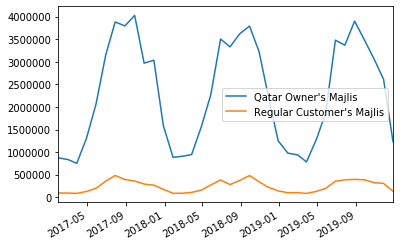

In [255]:
fig, ax =plt.subplots()
ax.legend(["Qatar","Regular"])
time_series_transposed.plot(y ='Sum',kind = 'line', ax =ax, label ="Qatar Owner's Majlis")
time_series2_transposed.plot(y ='Sum',kind = 'line', ax =ax, label = "Regular Customer's Majlis")

In [273]:
time_series_transposed.index = pd.to_datetime(time_series_transposed.index)
time_series2_transposed.index = pd.to_datetime(time_series_transposed.index)


<Figure size 1080x720 with 0 Axes>

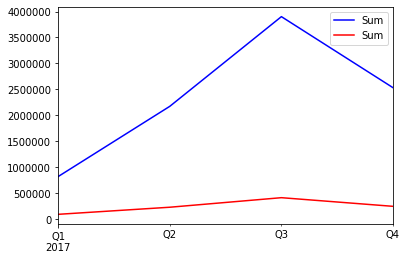

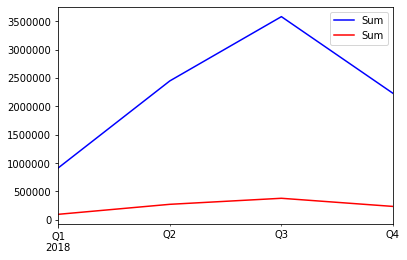

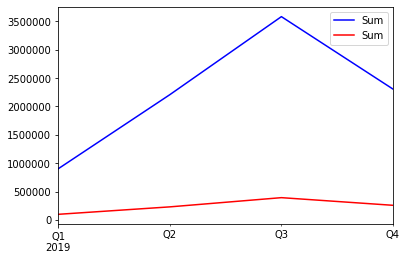

In [292]:
figure = plt.figure(figsize = (15,10))
ax1 = time_series_transposed.resample('Q').mean()[:4].plot(y='Sum', color ='b')
time_series2_transposed.resample('Q').mean()[:4].plot(y='Sum',ax = ax1, color ='r')
ax2 = time_series_transposed.resample('Q').mean()[4:8].plot(y='Sum', color ='b')
time_series2_transposed.resample('Q').mean()[4:8].plot(y='Sum',ax = ax2, color ='r')
ax3 = time_series_transposed.resample('Q').mean()[8:12].plot(y='Sum', color ='b')
time_series2_transposed.resample('Q').mean()[8:12].plot(y='Sum',ax = ax3, color ='r')
plt.show()

In [296]:
qatari_owners_maajles

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
95,Electricity,161471,161471,165559,QTR,Qatari Owners,Flat (Residential),1,Maajles,503917,...,21935,12046,7739,6786,5601,3248,255942,87045,91282,77615
158,Electricity,156137,156137,717689,QTR,Qatari Owners,Flat (Residential),1,Maajles,589780,...,7882,8889,6839,6200,4700,1770,143542,47571,44451,51520
1007,Electricity,94125,94125,69701,QTR,Qatari Owners,Flat (Residential),1,Maajles,693267,...,22081,23100,19416,16727,16100,8255,516736,183322,176600,156814
1476,Electricity,96048,96048,86950,QTR,Qatari Owners,Flat (Residential),1,Maajles,579691,...,17812,20572,14957,8637,16573,4840,369246,123971,121778,123497
1911,Electricity,103533,103533,77048,QTR,Qatari Owners,Flat (Residential),1,Maajles,219424,...,3940,3507,3338,4352,4243,1535,119885,48094,41362,30429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83120,Electricity,90577,90577,158402,QTR,Qatari Owners,Flat (Residential),1,Maajles,576763,...,5868,5758,6324,5134,4513,2538,161411,54325,56256,50830
83994,Electricity,81369,81369,58234,QTR,Qatari Owners,Flat (Residential),1,Maajles,603879,...,24191,27429,22487,23677,14808,9852,631266,222429,216528,192309
84240,Electricity,1003777,1003777,903831,QTR,Qatari Owners,Flat (Residential),1,Maajles,569633,...,16422,15634,13828,14492,15188,4184,346240,115868,120331,110041
84618,Electricity,67465,67465,-,QTR,Qatari Owners,Flat (Residential),1,Maajles,657573,...,7606,11232,9992,6243,5600,2596,215236,77063,71887,66286


In [297]:
qatari_owners_maajles['Sum']

95       255942
158      143542
1007     516736
1476     369246
1911     119885
          ...  
83120    161411
83994    631266
84240    346240
84618    215236
84645    131964
Name: Sum, Length: 345, dtype: int64

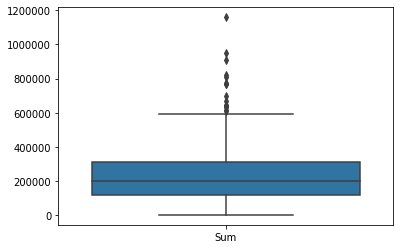

In [298]:
sns.boxplot(data =qatari_owners_maajles[['Sum']])

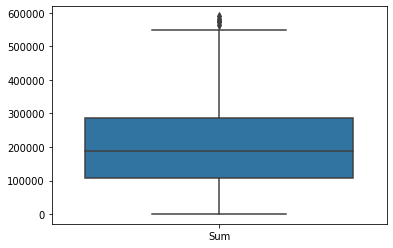

In [301]:
filtered = qatari_owners_maajles[qatari_owners_maajles['Sum'] <600000]
sns.boxplot(data =filtered [['Sum']])

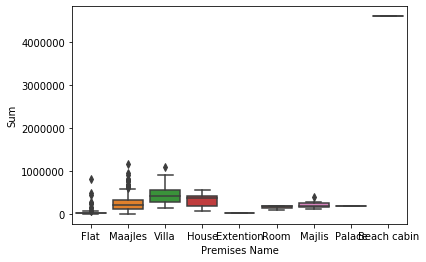

In [318]:
sns.boxplot(x='Premises Name', y ='Sum',data =qatari_owners)

# Regressing to find how much variation in energy consumption for qatari owners is accounted by maajles:

In [302]:
qatari_owners

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
21,Electricity,1060430,1060430,970137,QTR,Qatari Owners,Flat (Residential),1,Flat,497298,...,2285,571,346,353,538,655,16698,4849,6198,5651
95,Electricity,161471,161471,165559,QTR,Qatari Owners,Flat (Residential),1,Maajles,503917,...,21935,12046,7739,6786,5601,3248,255942,87045,91282,77615
158,Electricity,156137,156137,717689,QTR,Qatari Owners,Flat (Residential),1,Maajles,589780,...,7882,8889,6839,6200,4700,1770,143542,47571,44451,51520
1007,Electricity,94125,94125,69701,QTR,Qatari Owners,Flat (Residential),1,Maajles,693267,...,22081,23100,19416,16727,16100,8255,516736,183322,176600,156814
1100,Electricity,1035801,1035801,952710,QTR,Qatari Owners,Flat (Residential),1,Flat,298491,...,117,117,89,105,119,127,4272,1832,1205,1235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84240,Electricity,1003777,1003777,903831,QTR,Qatari Owners,Flat (Residential),1,Maajles,569633,...,16422,15634,13828,14492,15188,4184,346240,115868,120331,110041
84457,Electricity,1035880,1035880,952789,QTR,Qatari Owners,Flat (Residential),1,Flat,281146,...,889,798,758,880,786,767,28128,8799,9342,9987
84464,Electricity,1098732,1098732,1024234,QTR,Qatari Owners,Flat (Residential),1,Flat,1113626,...,742,531,737,0,383,635,16281,5186,6953,4142
84618,Electricity,67465,67465,-,QTR,Qatari Owners,Flat (Residential),1,Maajles,657573,...,7606,11232,9992,6243,5600,2596,215236,77063,71887,66286


In [304]:
dummy_variable1 = pd.get_dummies(qatari_owners['Premises Name'])
dummy_variable1

,Beach cabin,Extention,Flat,House,Maajles,Majlis,Palace,Room,Villa
21,0,0,1,0,0,0,0,0,0
95,0,0,0,0,1,0,0,0,0
158,0,0,0,0,1,0,0,0,0
1007,0,0,0,0,1,0,0,0,0
1100,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
84240,0,0,0,0,1,0,0,0,0
84457,0,0,1,0,0,0,0,0,0
84464,0,0,1,0,0,0,0,0,0
84618,0,0,0,0,1,0,0,0,0


In [305]:
# Focusing on Majlis, Villa, Beach Cabon and Flat for regression

In [306]:
dummy_variable1.drop(['Extention', 'House','Palace', 'Room'], axis =1, inplace =True)

In [308]:
new_qatari_owners = pd.concat([qatari_owners, dummy_variable1], axis =1)

In [335]:
X = new_qatari_owners[['Maajles','Majlis']]
y = new_qatari_owners['Sum']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [336]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(325, 2)
(140, 2)
(325,)
(140,)


In [337]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [338]:
lm.coef_

array([76070.93401977, 77329.28395062])

In [339]:
pd.DataFrame({'Premises Name':X.columns, 'Coefficient':lm.coef_})

,Premises Name,Coefficient
0,Maajles,76070.934020
1,Majlis,77329.283951


In [340]:
lm.score(X_train, y_train)

0.027671749183017735

In [341]:
lm.score(X_test, y_test)

-0.02772935757351913

In [343]:
predictions = lm.predict(X_test)
predictions

array([238049.98340249, 238049.98340249, 238049.98340249, 238049.98340249,
       238049.98340249, 161979.04938272, 238049.98340249, 238049.98340249,
       238049.98340249, 238049.98340249, 239308.33333333, 161979.04938272,
       161979.04938272, 161979.04938272, 238049.98340249, 238049.98340249,
       238049.98340249, 238049.98340249, 238049.98340249, 238049.98340249,
       161979.04938272, 161979.04938272, 238049.98340249, 161979.04938272,
       161979.04938272, 238049.98340249, 238049.98340249, 238049.98340249,
       238049.98340249, 238049.98340249, 238049.98340249, 238049.98340249,
       238049.98340249, 238049.98340249, 238049.98340249, 161979.04938272,
       238049.98340249, 238049.98340249, 161979.04938272, 239308.33333333,
       238049.98340249, 238049.98340249, 161979.04938272, 238049.98340249,
       161979.04938272, 238049.98340249, 238049.98340249, 238049.98340249,
       238049.98340249, 238049.98340249, 238049.98340249, 238049.98340249,
       238049.98340249, 2

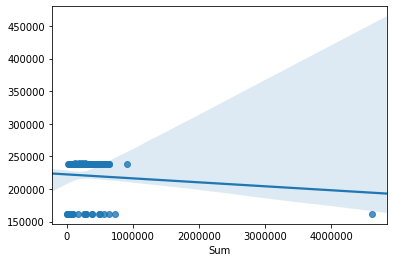

In [344]:
sns.regplot(y_test,predictions)

In [345]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

C:\Software\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Software\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Software\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Software\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                    Sum   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.582
Date:                Thu, 10 Dec 2020   Prob (F-statistic):             0.0109
Time:                        04:24:07   Log-Likelihood:                -4420.1
No. Observations:                 325   AIC:                             8846.
Df Residuals:                     322   BIC:                             8857.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.62e+05   2.18e+04      7.438      0.0

In [355]:
pearson = []
for col in dummy_variable1.columns:
    pearson.append(new_qatari_owners['Sum'].corr(new_qatari_owners[col]))
pearson_frame = pd.DataFrame({'Correalation':pearson}, index = dummy_variable1.columns)
pearson_frame.sort_values(by = 'Correalation', ascending =False)

,Correalation
Beach cabin,0.727127
Villa,0.173697
Maajles,0.051471
Majlis,-0.005069
Flat,-0.265827


# Now checking between RC Flats and Qatari Flats

In [223]:
qatari_owners_flats =qatari_owners[qatari_owners['Premises Name'] == 'Flat']
qatari_owners_flats

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
21,Electricity,1060430,1060430,970137,QTR,Qatari Owners,Flat (Residential),1,Flat,497298,...,2285,571,346,353,538,655,16698,4849,6198,5651
1100,Electricity,1035801,1035801,952710,QTR,Qatari Owners,Flat (Residential),1,Flat,298491,...,117,117,89,105,119,127,4272,1832,1205,1235
2400,Electricity,1059927,1059927,969489,QTR,Qatari Owners,Flat (Residential),1,Flat,1041664,...,676,487,662,821,722,709,22922,5418,8264,9240
4423,Electricity,1035814,1035814,952723,QTR,Qatari Owners,Flat (Residential),1,Flat,152205,...,153,145,132,156,130,160,3590,1052,1104,1434
4457,Electricity,1159727,1159727,1104599,QTR,Qatari Owners,Flat (Residential),1,Flat,578378,...,947,1247,1031,997,231,523,32384,9421,12019,10944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76353,Electricity,1082442,1082442,1006269,QTR,Qatari Owners,Flat (Residential),1,Flat,718450,...,510,132,807,127,886,824,11343,2947,3067,5329
76651,Electricity,1159672,1159672,1104545,QTR,Qatari Owners,Flat (Residential),1,Flat,785616,...,1675,958,167,1009,1103,996,27802,8913,9266,9623
81790,Electricity,1082142,1082142,1002973,QTR,Qatari Owners,Flat (Residential),1,Flat,811915,...,719,666,653,654,692,1209,29756,10201,9990,9565
84457,Electricity,1035880,1035880,952789,QTR,Qatari Owners,Flat (Residential),1,Flat,281146,...,889,798,758,880,786,767,28128,8799,9342,9987


In [224]:
Regular_Customers_Flat= Regular_Customers[Regular_Customers['Premises Name'] == 'Flat']
Regular_Customers_Flat

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
0,Electricity,1065899,1065899,982863,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,4752,3985,3555,3710,2909,1553,87875,24149,33093,30633
1,Electricity,1066042,1066042,983006,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,4485,4684,4039,3540,2706,748,71846,17657,25917,28272
2,Electricity,1082331,1082331,1006158,TRD,Regular Customers,Flat (Residential),1,Flat,560538,...,3191,1225,789,1186,1054,1546,41020,14837,11912,14271
3,Electricity,1099982,1099982,1015187,TRD,Regular Customers,Flat (Residential),1,Flat,999657,...,734,583,603,318,60,93,12017,4443,3961,3613
4,Electricity,188922,188922,160730,TRD,Regular Customers,Flat (Residential),1,Flat,171591,...,1854,1482,796,2962,2805,1746,57151,20158,18427,18566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84661,Electricity,1108343,1108343,-,TRD,Regular Customers,Flat (Residential),1,Flat,516791,...,4112,3990,4449,3096,2678,883,87833,30501,28336,28996
84662,Electricity,186164,186164,-,TRD,Regular Customers,Flat (Residential),1,Flat,591542,...,579,535,561,560,607,633,17503,5513,5144,6846
84663,Electricity,1065597,1065597,-,TRD,Regular Customers,Flat (Residential),1,Flat,1041261,...,1622,2288,1743,1211,773,426,23685,4112,7696,11877
84664,Electricity,1118539,1118539,-,TRD,Regular Customers,Flat (Residential),1,Flat,863991,...,10680,10808,12388,9468,9137,4713,240508,73560,82357,84591


In [227]:
t_test(Regular_Customers_Flat['Sum'], qatari_owners_flats['Sum'], 'less')

0.4858554809675351

In [228]:
# there is not a statistically significant difference between Qatari Flat owners and Regular Customers who own flats 

# Resampling to give kwh for each hour in 24 hours, for the span of 2017 to 2019

In [360]:
df_processed_copy = df_processed.copy()

df_processed_copy.drop(['Sum','Total 17','Total 18','Total 19'], axis =1, inplace =True)

In [365]:
df_processed_copy = df_processed_copy[df_processed_copy.columns[-36:]]

In [367]:
df_processed_copy = df_processed_copy.T

In [368]:
df_processed_copy.index =pd.to_datetime(df_processed_copy.index)

In [370]:
df_processed_copy['sum'] = df_processed_copy.sum(axis=1)

In [372]:
df_processed_copy = df_processed_copy[['sum']]

Text(0.5, 1.0, 'Monthly Energy Consumption Distribution')

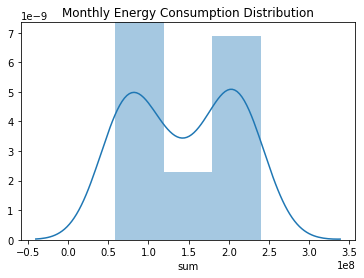

In [378]:
sns.distplot(df_processed_copy['sum'])
plt.title('Monthly Energy Consumption Distribution')

# Month of Highest Energy Consumption

In [398]:
str(np.argmax(df_processed_copy.values, axis=0))

'[8]'

In [401]:
df_processed_copy['sum'].idxmax()

Timestamp('2017-09-28 00:00:00')

In [402]:
df_processed_copy['sum'].idxmin()

Timestamp('2017-03-28 00:00:00')

In [ ]:
df_processed_copy = df_processed_copy.reset_index()


In [418]:
df_processed_copy['month'] = df_processed_copy['index'].dt.month
df_processed_copy

,level_0,index,sum,month
0,0,2017-01-28,65929222,1
1,1,2017-02-28,67026267,2
2,2,2017-03-28,58497674,3
3,3,2017-04-28,86478334,4
4,4,2017-05-28,139857729,5
5,5,2017-06-28,196400820,6
6,6,2017-07-28,217023687,7
7,7,2017-08-28,228231690,8
8,8,2017-09-28,239927665,9
9,9,2017-10-28,187039822,10


Text(0.5, 1.0, 'Yearly Comparison of Energy Consumption each month')

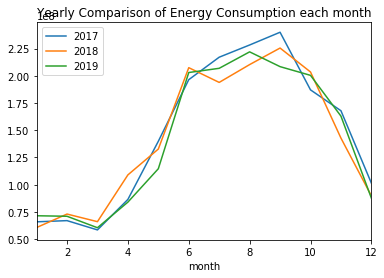

In [432]:
ax1 = df_processed_copy.iloc[:12].plot(x= 'month', y='sum', label ='2017')
df_processed_copy.iloc[12:24].plot(x='month',y='sum', label ='2018', ax =ax1)
df_processed_copy.iloc[24:36].plot(x='month',y='sum', label ='2019', ax =ax1)
plt.title('Yearly Comparison of Energy Consumption each month')



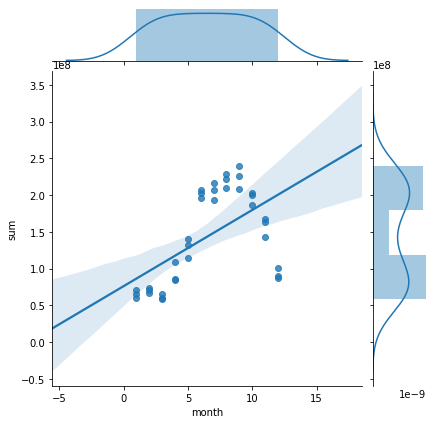

In [419]:
sns.jointplot(x= df_processed_copy['month'], y=df_processed_copy['sum'], data =df_processed_copy, kind ='reg')

In [436]:
#qatari_owners
#Regular_Customers
df_processed['Customer Type'].unique()

array(['Regular Customers', 'Qatari Owners',
       "Rented Premises by Qatari's", 'Government Owned'], dtype=object)

In [438]:
RPQ = df_processed[df_processed['Customer Type'] == "Rented Premises by Qatari's"]

In [473]:
go = df_processed[df_processed['Customer Type'] == "Government Owned"]

In [474]:
go

,Meter Type,Parent Number,Elec Num,Water Num,GL Class,Customer Type,Premises Category,Premises Category Id,Premises Name,Customer No,...,2019-07-28 00:00:00,2019-08-28 00:00:00,2019-09-28 00:00:00,2019-10-28 00:00:00,2019-11-28 00:00:00,2019-12-28 00:00:00,Sum,Total 17,Total 18,Total 19
257,Electricity,131286,131286,95486,TRD,Government Owned,Flat (Residential),1,Flat,528611,...,2017,2208,2156,1802,1479,1003,48354,14039,16695,17620
9663,Electricity,131294,131294,95494,TRD,Government Owned,Flat (Residential),1,Flat,528611,...,1611,1601,201,1563,1243,746,33716,12674,8828,12214


In [442]:
qatari_owners.drop(['Sum','Total 17','Total 18','Total 19'], axis =1, inplace =True)
qatari_owners = qatari_owners[qatari_owners.columns[-36:]]

C:\Software\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [447]:
q = qatari_owners.T
q.index = pd.to_datetime(q.index)
q['sum'] =q.sum(axis=1)

In [451]:
Regular_Customers.drop(['Sum','Total 17','Total 18','Total 19'], axis =1, inplace =True)


,2017-01-28,2017-02-28,2017-03-28,2017-04-28,2017-05-28,2017-06-28,2017-07-28,2017-08-28,2017-09-28,2017-10-28,...,2019-03-28,2019-04-28,2019-05-28,2019-06-28,2019-07-28,2019-08-28,2019-09-28,2019-10-28,2019-11-28,2019-12-28
0,690,806,526,1049,2153,1812,2707,3954,4704,2799,...,800,1601,1801,3953,4752,3985,3555,3710,2909,1553
1,334,342,269,280,2168,2759,1890,3103,2866,1760,...,405,1101,1649,3745,4485,4684,4039,3540,2706,748
2,1283,2146,1194,0,1664,1652,1045,0,0,0,...,704,1892,0,0,3191,1225,789,1186,1054,1546
3,132,52,92,200,354,614,855,660,655,398,...,47,96,415,557,734,583,603,318,60,93
4,474,536,504,535,1618,2342,2063,1374,3104,2753,...,607,843,1205,3117,1854,1482,796,2962,2805,1746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84661,817,1040,949,1299,2047,0,8246,4384,4435,3437,...,987,1201,1881,3674,4112,3990,4449,3096,2678,883
84662,504,478,423,379,416,429,542,519,505,529,...,500,583,529,622,579,535,561,560,607,633
84663,717,642,0,0,0,9,46,86,242,1060,...,434,701,548,1388,1622,2288,1743,1211,773,426
84664,2351,1896,1236,3371,7718,7984,10608,8285,11358,6928,...,2980,4218,5766,6851,10680,10808,12388,9468,9137,4713


In [452]:
Regular_Customers = Regular_Customers[Regular_Customers.columns[-36:]]
R = Regular_Customers.T
R.index = pd.to_datetime(R.index)
R['sum'] =R.sum(axis=1)

In [454]:
RPQ.drop(['Sum','Total 17','Total 18','Total 19'], axis =1, inplace =True)
RPQ = RPQ[RPQ.columns[-36:]]
rpq = RPQ.T
rpq.index = pd.to_datetime(rpq.index)
rpq['sum'] =rpq.sum(axis=1)

In [455]:
go.drop(['Sum','Total 17','Total 18','Total 19'], axis =1, inplace =True)
go = go[go.columns[-36:]]
GO = go.T
GO.index = pd.to_datetime(GO.index)
GO['sum'] =GO.sum(axis=1)

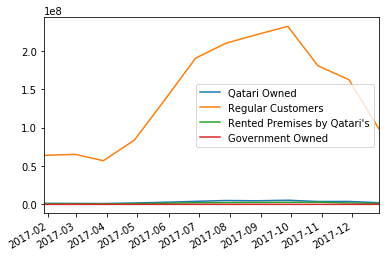

In [467]:
ax1 = q.iloc[:12].plot(y='sum', label ='Qatari Owned')
R.iloc[:12].plot(y='sum', label ='Regular Customers', ax= ax1)
rpq.iloc[:12].plot(y='sum', label ="Rented Premises by Qatari's", ax= ax1)
GO.iloc[:12].plot(y='sum', label ="Government Owned", ax= ax1)


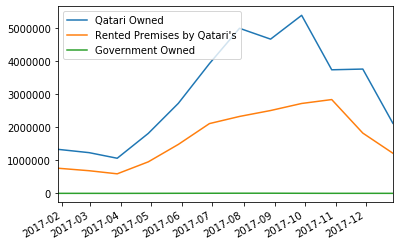

In [466]:
ax1 = q.iloc[:12].plot(y='sum', label ='Qatari Owned')
#R.iloc[:12].plot(y='sum', label ='Regular Customers', ax= ax1)
rpq.iloc[:12].plot(y='sum', label ="Rented Premises by Qatari's", ax= ax1)
GO.iloc[:12].plot(y='sum', label ="Government Owned", ax= ax1)


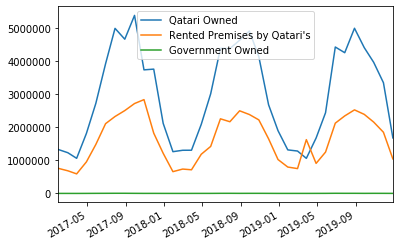

In [468]:
ax1 = q.plot(y='sum', label ='Qatari Owned')
#R.plot(y='sum', label ='Regular Customers', ax= ax1)
rpq.plot(y='sum', label ="Rented Premises by Qatari's", ax= ax1)
GO.plot(y='sum', label ="Government Owned", ax= ax1)


# Compared to RPQ, Qatari owned buildings show larger consumption
# what is noteworthy is the fact that there is a decrease in energy consumption of qatari buildings after august before hitting the peak in September

In [484]:
R['Month'] = R.index.month

Text(0.5, 1.0, 'Yearly Comparison of Energy Consumption each month of Regualar Customers')

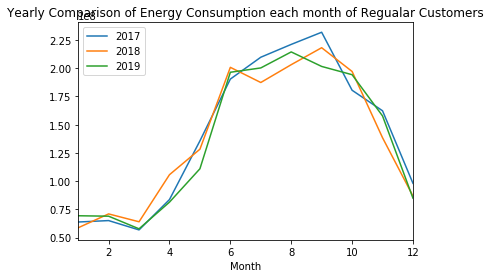

In [487]:
ax1 = R.iloc[:12].plot(x = 'Month',y='sum', label ='2017')
R.iloc[12:24].plot(x = 'Month',y='sum', label ='2018', ax =ax1)
R.iloc[24:36].plot(x = 'Month',y='sum', label ='2019', ax =ax1)
plt.title('Yearly Comparison of Energy Consumption each month of Regualar Customers')
